# Part I: Data Analysis - Amazon Top Selling Books

In [1]:
"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."


'I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/Amazon_top_selling_book.csv")

In [4]:
df.shape

(550, 7)

In [5]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [6]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
# Note that min Price is 0. This could be a missing value. Lets check them
# I'm going to impute the misssing price values by average Price

print(df[df['Price']==0])

df.loc[df['Price']==0, 'Price'] = df['Price'].mean()
df.describe()

                                                  Name  \
42          Cabin Fever (Diary of a Wimpy Kid, Book 6)   
71             Diary of a Wimpy Kid: Hard Luck, Book 8   
116                        Frozen (Little Golden Book)   
193                               JOURNEY TO THE ICE P   
219                                  Little Blue Truck   
358              The Constitution of the United States   
381                                        The Getaway   
461  The Short Second Life of Bree Tanner: An Eclip...   
505                              To Kill a Mockingbird   
506                              To Kill a Mockingbird   
507                              To Kill a Mockingbird   
508                              To Kill a Mockingbird   

                               Author  User Rating  Reviews  Price  Year  \
42                        Jeff Kinney          4.8     4505      0  2011   
71                        Jeff Kinney          4.8     6812      0  2013   
116              

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.385818,2014.000000
std,0.226980,11731.132017,10.664041,3.165156
min,3.300000,37.000000,1.000000,2009.000000
25%,4.500000,4058.000000,8.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    float64
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 30.2+ KB


In [10]:
df.isnull().sum(axis=0) #No missing values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [11]:
# Name, Author and Genre are of type object. 
# I don't think Name and Author should be changed to categorical
# But just for sanity check let's verify the unique values

df[['Name', 'Author', 'Genre']].nunique()

Name      351
Author    248
Genre       2
dtype: int64

In [12]:
# Since Genre has only two unique values we can convert it to 0, 1
df['Genre'].unique()

# Non Fiction = 0
df['Genre'] = (df['Genre'] == 'Non Fiction').astype(int)

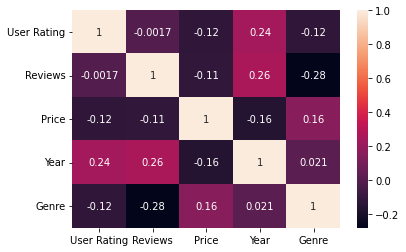

In [13]:
# Checking correlations between the variables

sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
# Doesn't seem like there is a strong correlation between any variables

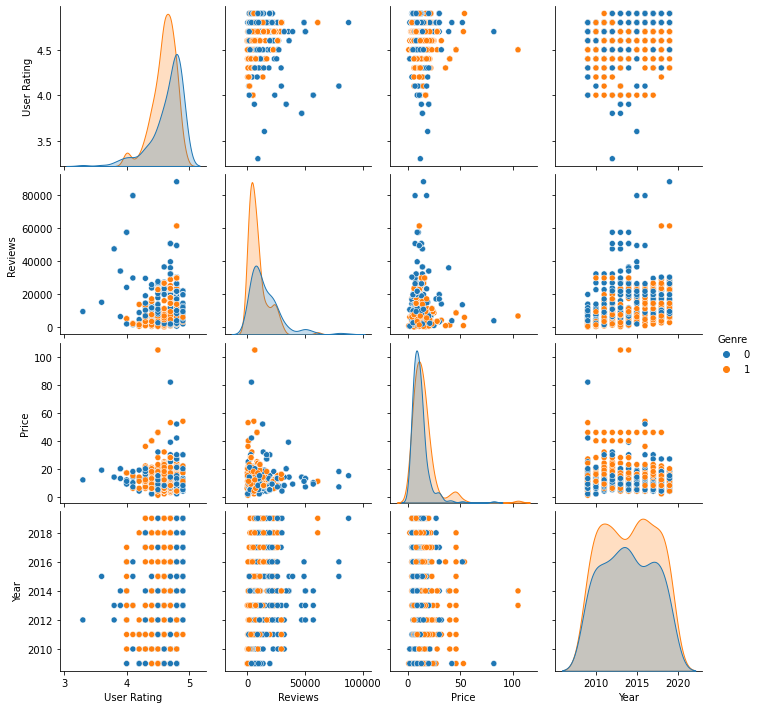

In [15]:
# Lets check a pairplot with genre as hue to see if it affects the other variables

sns.pairplot(df, hue="Genre");
plt.show()

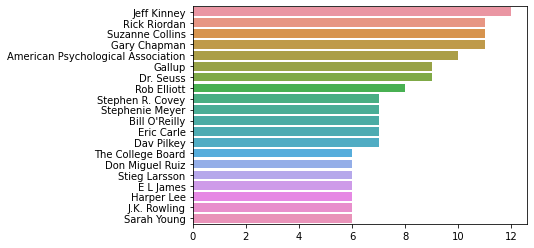

In [16]:
# Data is pretty mixed between the two genres for all variables. There isn't any obvious distinctions

# Lets check the top selling authors
top20authors = df['Author'].value_counts(sort=True, ascending=False)[:20,]
sns.barplot(x=top20authors.values, y=top20authors.index)
plt.show()

In [17]:
# Best Selling author Jeff Kinney with 12 books. 3 people with 11 books

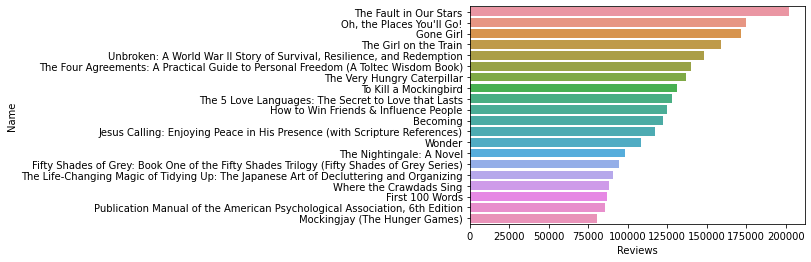

In [18]:
# Most reviewed books

top20books = df.groupby(['Name']).agg({'Reviews':sum}).sort_values('Reviews', ascending=False).iloc[:20,]
sns.barplot(x=top20books['Reviews'], y=top20books.index)
plt.show()

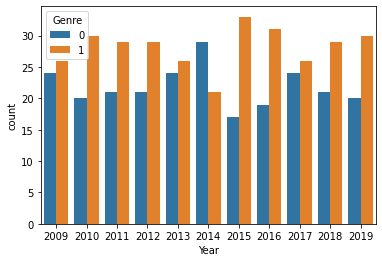

In [19]:
# Finally lets create a countplot of fiction and non-fiction books over the year

sns.countplot(x='Year', hue='Genre', data=df)
plt.show()

In [20]:
# In 2014 there were more non-fiction books in the top-selling list than fiction books
# This has never happened again

# Part I: Data Analysis - Netflix Titles

In [21]:
df2 = pd.read_csv("datasets/netflix_titles.csv")

In [22]:
df2.shape

(8807, 12)

In [23]:
df2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [24]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
# Convert date added to datetime
df2['date_added'] = pd.to_datetime(df2['date_added'])

In [26]:
df2.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [28]:
df2.isnull().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
# There are many missing values in some variables. However, all of these are object data
# and it would make no sense to replace them by mode. But removing all of them also doesn't 
# make sense. Missing Director is about 25% of the total data.
# I'll add other values to director, cast and country and remove the rest

df2['director'].fillna('Other', inplace=True)
df2['cast'].fillna('Other', inplace=True)
df2['country'].fillna('Other', inplace=True)

df2.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [31]:
# Now there are no missing values

# Let's see if there are any columns with few unique values that could be converted to categorical

df2.nunique()

# 'type' can be converted and maybe rating. Nothing else

show_id         8790
type               2
title           8790
director        4527
cast            7679
country          749
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

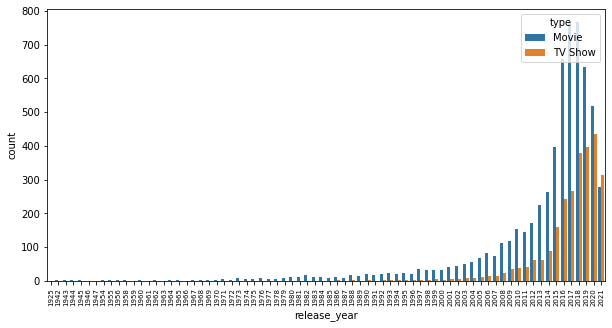

In [32]:
# Lets make a countplot of type released yearwise
plt.figure(figsize=(10,5))
ax = sns.countplot(x='release_year', hue='type', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
plt.show()

In [33]:
# From 2008-09 content has increased exponentially. 
# Number of movies released has consistently been higher than TV shows

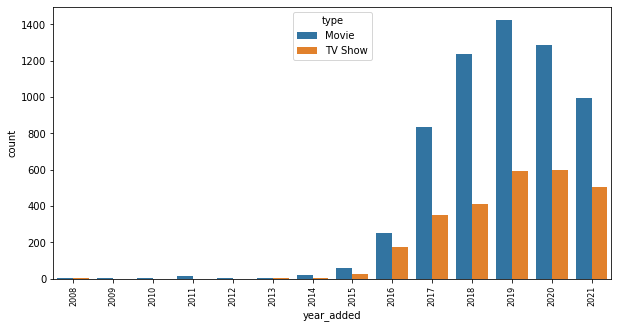

In [34]:
# Lets make a countplot of type added yearwise
df2['year_added'] = df2['date_added'].dt.year
plt.figure(figsize=(10,5))
ax = sns.countplot(x='year_added', hue='type', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
plt.show()

In [35]:
# Content added on Netflix has also increased exponentially since 2015. However, this has also seen a decreasing trend since 2019
# - Corona Effect??

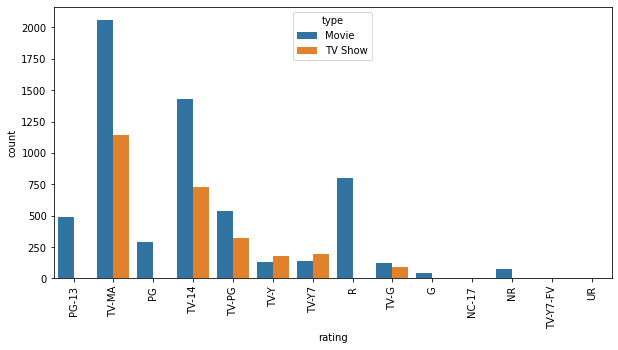

In [36]:
# Rating-wise content

plt.figure(figsize=(10,5))
ax = sns.countplot(x='rating', hue='type', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

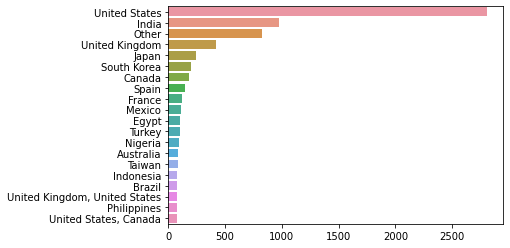

In [37]:
# Top 10 countries with most content

top20countries = df2['country'].value_counts(sort=True, ascending=False)[:20,]
sns.barplot(x=top20countries.values, y=top20countries.index)
plt.show()

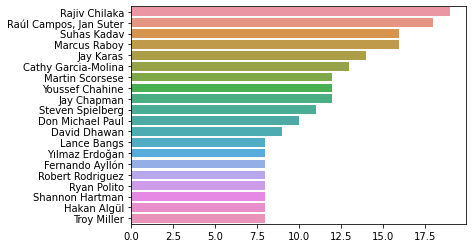

In [38]:
# Top Directors

top20directors = df2[df2['director'] != 'Other']['director'].value_counts(sort=True, ascending=False)[:20,]
sns.barplot(x=top20directors.values, y=top20directors.index)
plt.show()

# Part I: Data Analysis - Diamonds

In [39]:
df3 = pd.read_csv("datasets/diamonds.csv")

In [40]:
df3.shape

(53940, 11)

In [41]:
df3.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [43]:
df3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
# Unnamed is just index. Drop it

df3 = df3.drop(columns=['Unnamed: 0'])

In [45]:
df3.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [46]:
# x, y and z shouldn't have 0 values since they are size in mm. Must be missing values
# Let's check how many there are

print((df3['x'] == 0).sum())
print((df3['y'] == 0).sum())
print((df3['z'] == 0).sum())

# Very few values missing. I'm removing them
df3 = df3[(df3['x'] != 0) & (df3['y'] != 0) & (df3['z'] != 0)]

8
7
20


In [47]:
# check for other missing values

df3.isnull().sum(axis=0)
df3.isna().sum(axis=0)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [48]:
# No missing data
# Describe again

df3.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [49]:
# Now lets check unique counts of categorical variables 

df3[['cut', 'color', 'clarity']].nunique()

cut        5
color      7
clarity    8
dtype: int64

In [50]:
print(df3['cut'].unique())
print(df3['color'].unique()) 
print(df3['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [51]:
# Not a lot of values, we can one hot encode them

df3_1hot = pd.get_dummies(df3, drop_first=True)

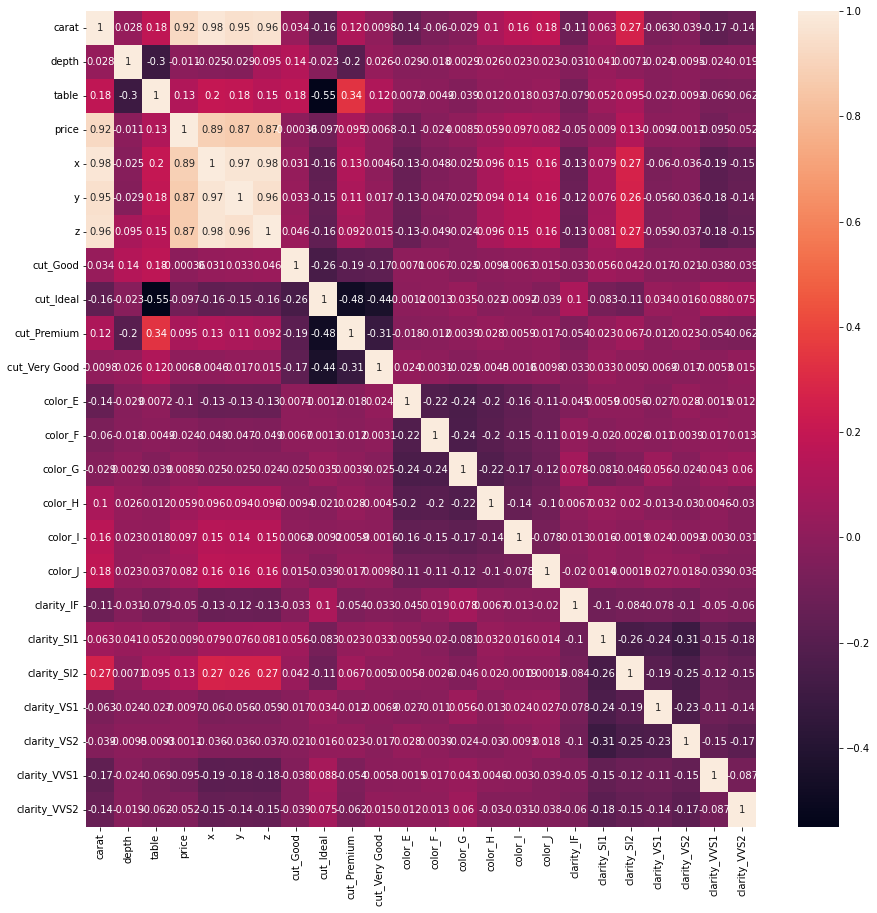

In [52]:
# Now we can check correlation plot
plt.figure(figsize=(15,15))
sns.heatmap(df3_1hot.corr(), annot=True)
plt.show()

In [53]:
# Very obvious correlation in x, y and z
# Strong positive correlation in size(x, y, z), carat and price

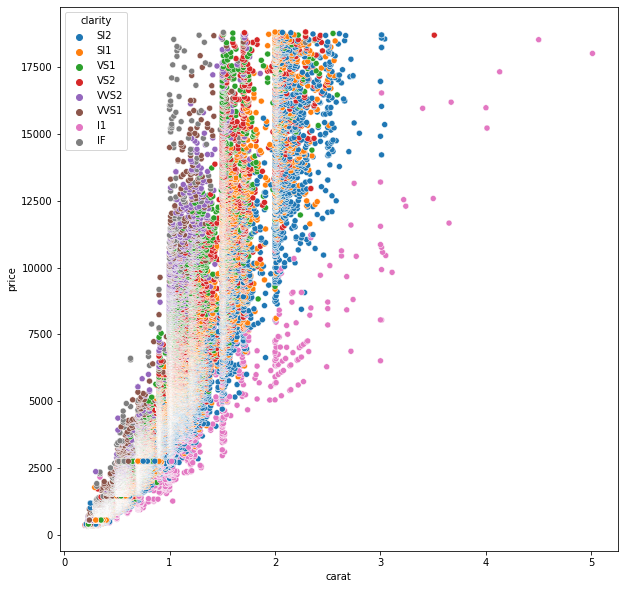

In [54]:
# Not very clear from above whether clarity, color and cut have any relationship with price
# Lets check that from the original data

plt.figure(figsize=(10,10))
sns.scatterplot(x='carat', y='price', data=df3, hue='clarity')
plt.show()

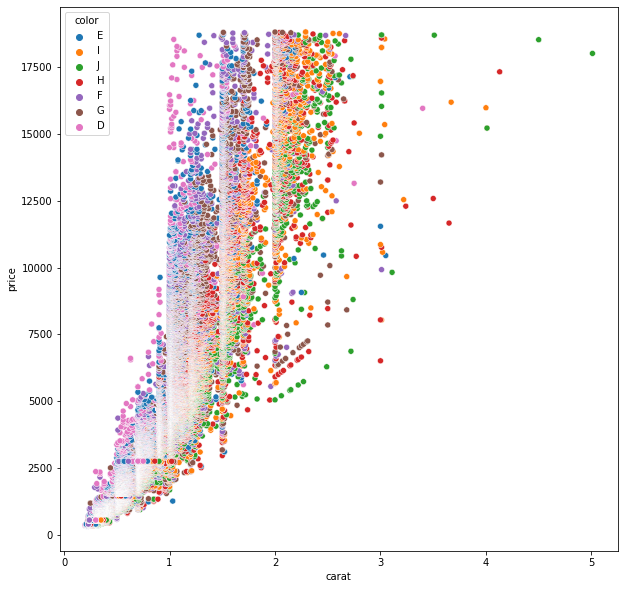

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='carat', y='price', data=df3, hue='color')
plt.show()

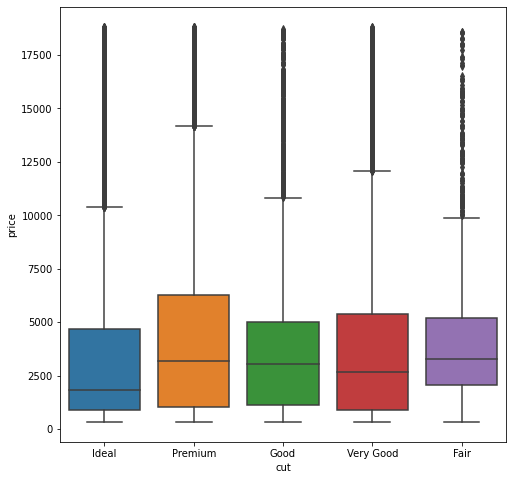

In [56]:
# For cut, we can just check the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(x='cut', y='price', data=df3)
plt.show()

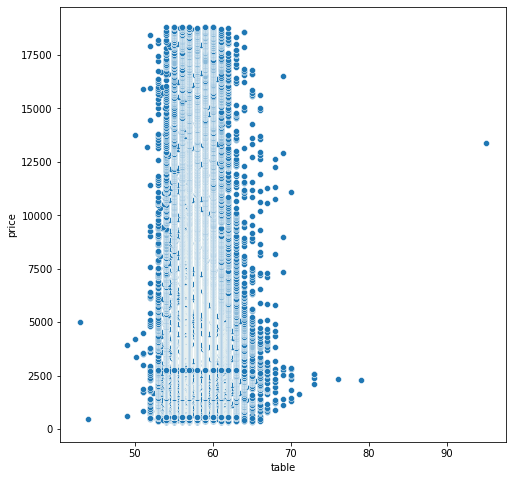

In [57]:
# Any relationship between price and table

plt.figure(figsize=(8,8))
sns.scatterplot(x='table', y='price', data=df3)
plt.show()

In [58]:
# No everything is very uniform

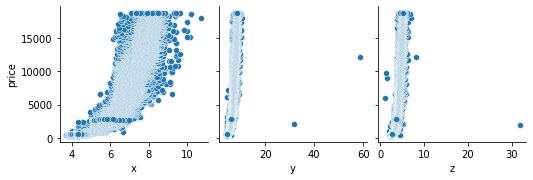

In [59]:
# Lets draw some pairplots to verify the relationship between price and x, y, z

sns.pairplot(x_vars=['x','y','z'], y_vars=['price'], data=df3)
plt.show()

## References

1. https://seaborn.pydata.org/generated/seaborn.pairplot.html
2. https://seaborn.pydata.org/generated/seaborn.countplot.html